# Load Dependencies load csv files and transform in To data frame

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
city_data =  ("data/city_data.csv")
ride_data =  ("data/ride_data.csv")

city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)


In [2]:

# Combine the data into a single dataset
city_data_df=city_data_df.drop_duplicates('city', keep = 'first')

city_ride_data = city_data_df.merge(ride_data_df, on = 'city')


city_ride_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [3]:

#take total fare per city
total_city_fare = city_ride_data.groupby("city")["fare"].sum()
#take the avg far per city
avg_fare = city_ride_data.groupby("city")["fare"].mean()

# rides per city
total_city_rides= city_ride_data.groupby("city")["ride_id"].count()

# total number drivers per city
city_total_drivers = city_ride_data.groupby("city")["driver_count"].mean()



In [4]:
#set main data frame index by city and type coloms 
city_type =city_data_df.set_index('city')['type']

#take the sum mean and count form cell above and add them to a new data frame 
info_city = pd.DataFrame({
    "Total City rides":total_city_rides,
    "Average Fare":avg_fare,
    "total city drivers":city_total_drivers,
    "Total city fare":total_city_fare,
    "Type of City":city_type})


info_city.head()
    


,Total City rides,Average Fare,total city drivers,Total city fare,Type of City
Amandaburgh,18,24.641667,12,443.55,Urban
Barajasview,22,25.332273,26,557.31,Urban
Barronchester,16,36.422500,11,582.76,Suburban
Bethanyland,18,32.956111,22,593.21,Suburban
Bradshawfurt,10,40.064000,7,400.64,Rural


In [5]:
#created Df for each type 

Urban =info_city[info_city['Type of City']== 'Urban']
Suburban = info_city [info_city['Type of City']== 'Suburban']
Rural = info_city [info_city['Type of City']== 'Rural']

## create Scatter plot useing data and data frames above 

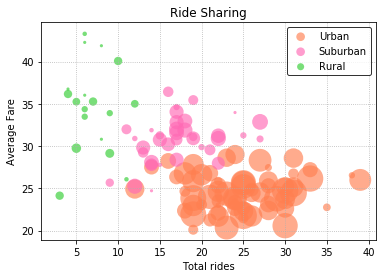

In [6]:

#create my Scatter plot 

plt.scatter(Urban['Total City rides'], Urban['Average Fare'], s = Urban['total city drivers']*10, color='coral', label = 'Urban',
alpha=0.65, edgecolors='none')                                           
plt.scatter(Suburban['Total City rides'], Suburban['Average Fare'], s = Suburban['total city drivers']*10, color='hotpink',
alpha=0.65, edgecolors='none', label = 'Suburban')  

plt.scatter(Rural['Total City rides'], Rural['Average Fare'], s = Rural['total city drivers']*10, color='limegreen',
alpha=0.65, edgecolors='none', label = 'Rural')
                                             
                                             
                                             
                                             
                                             
plt.grid(linestyle= 'dotted')
plt.xlabel("Total rides")
plt.ylabel('Average Fare')
plt.title('Ride Sharing')

lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[0]._sizes = [75]



                                             
plt.show()                                             

# Create pie chart from data frame ride_data..

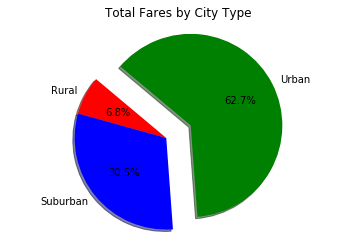

In [7]:
#create new group by data frame based on type 
type_df=city_ride_data.groupby('type')['type', 'fare', 'ride_id', 'driver_count']
#sum of all city types 
fare_data = type_df.sum()['fare']

chart_type = ["Rural","Suburban" ,"Urban"]


colors= ["red","blue","green"]
explode = [0, 0, .3]

plt.pie(fare_data, explode=explode, labels=chart_type, colors=colors,
       autopct = "%1.1f%%", shadow=True, startangle=140 )
plt.title("Total Fares by City Type")
plt.axis("equal")
plt.show()


## Total Rides by City Type

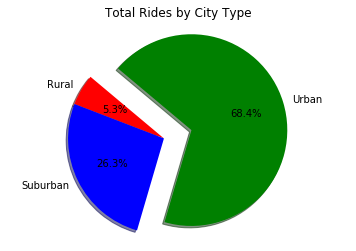

In [9]:
#create new group by data frame based on type 
type_df=city_ride_data.groupby('type')['type', 'fare', 'ride_id', 'driver_count']
#sum of all city types 
fare_data = type_df.count()['ride_id']

chart_type = ["Rural","Suburban" ,"Urban"]


colors= ["red","blue","green"]
explode = [0, 0, .3]

plt.pie(fare_data, explode=explode, labels=chart_type, colors=colors,
       autopct = "%1.1f%%", shadow=True, startangle=140 )
plt.title("Total Rides by City Type")
plt.axis("equal")
plt.show()

## Total Drivers by City Type

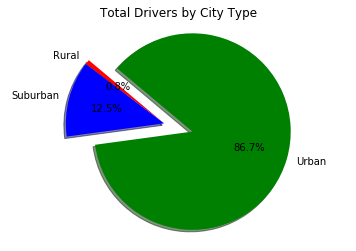

In [11]:
type_df=city_ride_data.groupby('type')['type', 'fare', 'ride_id', 'driver_count']
#sum of all city types 
fare_data = type_df.sum()['driver_count']
chart_type = ["Rural","Suburban" ,"Urban"]


colors= ["red","blue","green"]
explode = [0, 0, .3]

plt.pie(fare_data, explode=explode, labels=chart_type, colors=colors,
       autopct = "%1.1f%%", shadow=True, startangle=140 )
plt.title("Total Drivers by City Type")
plt.axis("equal")
plt.show()
